## Decoding Data Scientist Salaries: Analyzing Trends and Experience-Based Distributions

# Import Libraries

In [443]:
import pandas as pd

In [444]:
import seaborn as sns

In [445]:
import matplotlib.pyplot as plt

In [446]:
dfm = pd.read_csv("ds_salaries.csv")
df = dfm

In [447]:
df.dtypes

Unnamed: 0             int64
work_year              int64
experience_level      object
employment_type       object
job_title             object
salary                 int64
salary_currency       object
salary_in_usd          int64
employee_residence    object
remote_ratio           int64
company_location      object
company_size          object
dtype: object

# Data Cleaning

In [448]:
df.rename(columns={df.columns[0]: 'index'}, inplace=True)

In [449]:
df.drop(columns=['salary_currency'], inplace=True)

In [450]:
missing_df = df.isna().sum()

In [451]:
print(missing_df)

index                 0
work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64


# Data Wrangling

In [452]:
df['Experience'] = df['experience_level'].replace({'EN': 'Entry', 'MI': 'Junior', 'SE': 'Senior','EX': 'Executive'})

In [453]:
df['Workplace'] = df['remote_ratio'].replace({0: 'In-Person', 50: 'Hybrid', 100: 'Remote'})

In [454]:
df['Company_Size'] = df['company_size'].replace({'L': 'Large', 'M': 'Medium', 'S': 'Small'})

In [455]:
bins = [0, 50000, 100000, 150000, float('inf')]
labels = ['Low', 'Medium', 'High', 'Very High']
df['salary_range'] = pd.cut(df['salary_in_usd'], bins=bins, labels=labels)

In [456]:
df.rename(columns={'salary_in_usd': 'Salary', 'work_year': 'Year'}, inplace=True)

In [457]:
df['Year'] = df['Year'].round().astype(int)
df['Year'] = df['Year'].astype('category')

# Data Visualization

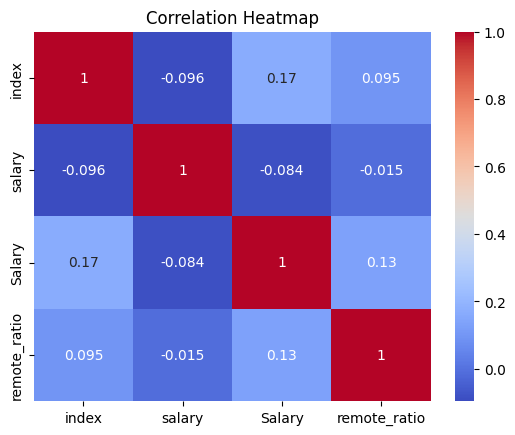

In [458]:
numerical_columns = df.select_dtypes(include='int64')
correlation_matrix = numerical_columns.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

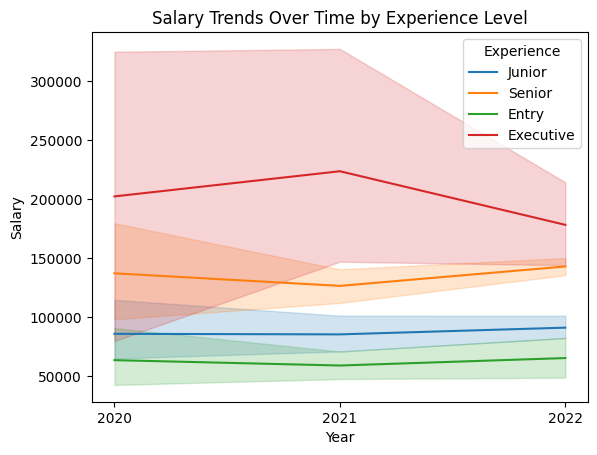

In [459]:
sns.lineplot(data=df, x='Year', y='Salary', hue='Experience')

plt.xticks(ticks=[2020, 2021, 2022])  # Use actual year values

plt.title('Salary Trends Over Time by Experience Level')
plt.show()

Analysis of Salary Trends Over Time by Experience Level
The line plot shows salary trends from 2020 to 2022 across different experience levels: Junior, Senior, Entry, and Executive.

Executive Salaries: Executives have the highest salaries, peaking in 2021 but slightly declining in 2022. This suggests volatility possibly due to market or company performance changes.

Senior and Junior Salaries: Senior salaries steadily increased over the three years, reflecting strong demand for experienced professionals. Junior salaries showed a modest increase, indicating slower growth compared to more senior levels.

Entry-Level Salaries: Entry-level salaries remained relatively flat, suggesting limited early-career pay increases.

Disparity and Variability: There is a significant salary gap between Executives and lower levels. The wider confidence interval for Executives shows higher variability, likely due to performance-based compensation like bonuses.

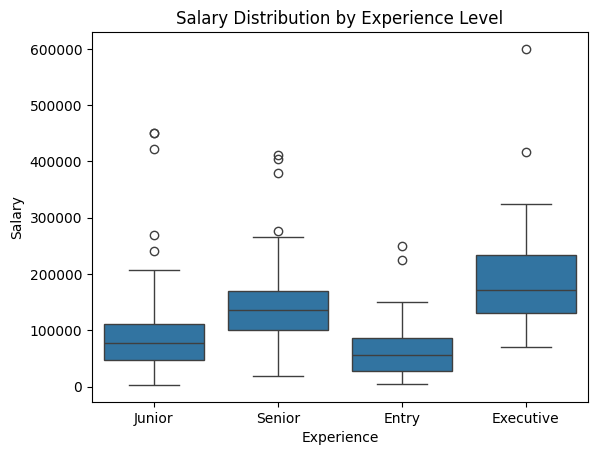

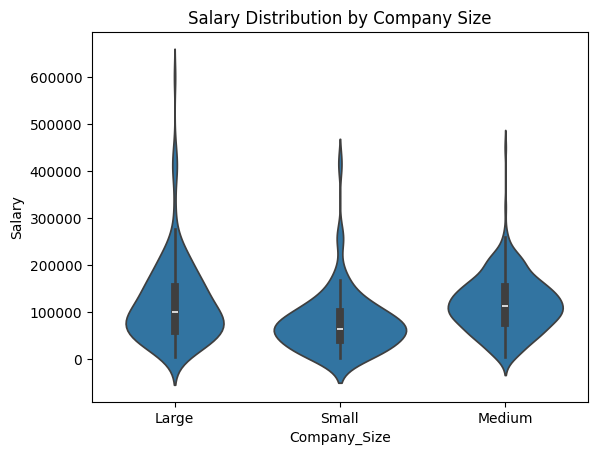

In [460]:
sns.boxplot(data=df, x='Experience', y='Salary')
plt.title('Salary Distribution by Experience Level')
plt.show()

sns.violinplot(data=df, x='Company_Size', y='Salary')
plt.title('Salary Distribution by Company Size')
plt.show()

The visualizations indicate that salary distribution varies significantly based on both experience level and company size:

Experience Level: Salaries generally increase with experience, with executives earning the highest median salaries and having the most variability. Entry-level positions show the lowest salaries and least variability, while junior and senior positions fall in between.

Company Size: Large companies show a wider range of salary distributions, likely due to a mix of entry-level and high-level positions. Medium-sized companies have moderate salary variability, while small companies tend to offer more standardized pay with less variability.

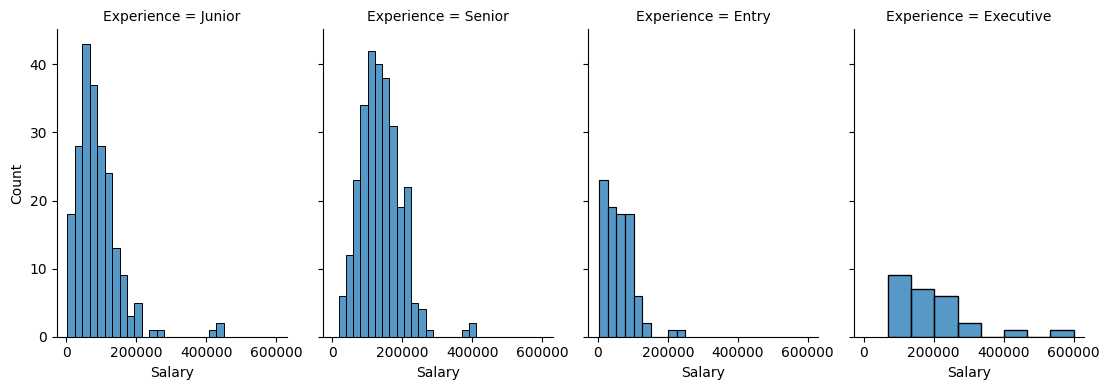

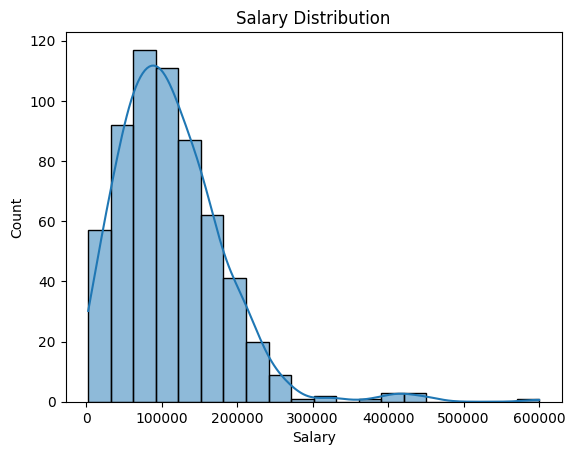

In [461]:
g = sns.FacetGrid(df, col="Experience", height=4, aspect=0.7)
g.map(sns.histplot, "Salary")
plt.show()

sns.histplot(data=df, x='Salary', bins=20, kde=True)
plt.title('Salary Distribution')
plt.show()

Salary Distribution by Experience Level

The histograms show salary distributions across different experience levels (Junior, Senior, Entry, Executive).
Junior Level: Salaries are mostly concentrated below 100,000 USD, with a few instances of higher salaries, indicating limited variability.
Senior Level: Salaries generally range between 50,000 USD and 200,000 USD, showing higher earnings and variability compared to juniors.
Entry Level: Salaries are mostly under 100,000USD, with fewer employees at higher salary levels. This aligns closely with the Junior level, suggesting a similar pay scale.
Executive Level: Salaries are more dispersed, ranging from 100,000 USD to over 500,000 USD, indicating substantial variability and higher earning potential.

Overall Salary Distribution

The overall distribution shows a right-skewed pattern, with most salaries concentrated under $150,000. There is a long tail extending towards higher salaries, suggesting fewer employees earn significantly more.

C:\Users\thema\AppData\Local\Temp\ipykernel_16332\1800112127.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='Workplace', y='Salary', palette=colors, order=workplace_order)


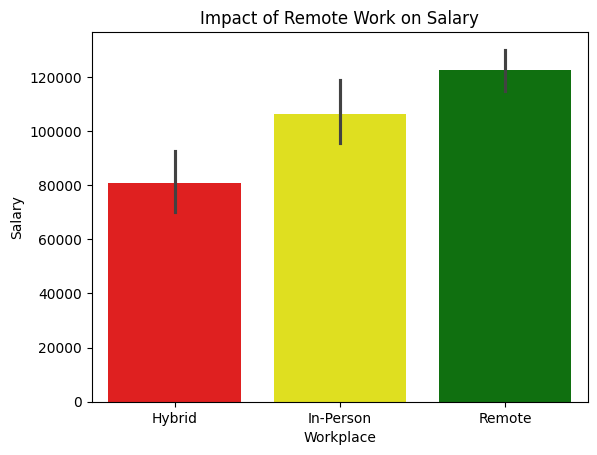

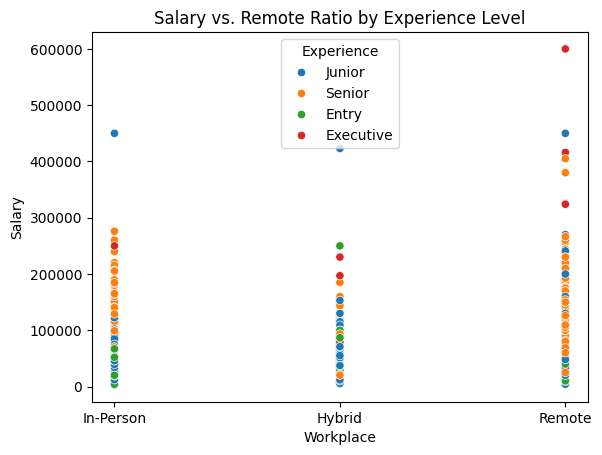

In [462]:
mean_salaries = df.groupby('Workplace')['Salary'].mean()

workplace_order = mean_salaries.sort_values().index

color_map = {
    workplace_order[0]: 'red',     # Lowest mean salary
    workplace_order[1]: 'yellow',  # Middle mean salary
    workplace_order[2]: 'green'    # Highest mean salary
}

colors = [color_map[workplace] for workplace in workplace_order]

sns.barplot(data=df, x='Workplace', y='Salary', palette=colors, order=workplace_order)
plt.title('Impact of Remote Work on Salary')
plt.show()

sns.scatterplot(data=df, x='Workplace', y='Salary', hue='Experience')
plt.title('Salary vs. Remote Ratio by Experience Level')
plt.show()

The analysis of the impact of remote work on salary reveals some clear trends. In the first chart, we see that employees who work fully remotely have the highest average salaries, which exceed 120,000 USD. This suggests that remote positions might offer a salary premium, possibly due to higher demand for remote work or the specialized skills required for these roles. In contrast, employees who work in-person earn slightly more than 100,000 USD on average. Hybrid workers, who split their time between the office and working from home, have the lowest average salaries, around 90,000 USD. This could indicate that while hybrid work offers flexibility, it may come with a lower pay scale.

The second chart provides a breakdown of salary by remote work status and experience level. Executives consistently have the highest salaries across all work environments, but the top-earning executives are more likely to work remotely. Junior and entry-level employees generally have lower salaries, regardless of whether they work remotely, in-person, or in a hybrid setup. Senior employees show a broader salary range, especially in remote settings, which suggests that remote work might offer greater earning potential for those with more experience.

Overall, fully remote work tends to be associated with higher salaries, indicating a financial advantage for employees who can work from home. Executives appear to benefit the most from remote work arrangements, reflecting both higher compatibility with remote roles and higher pay. In contrast, hybrid workers earn the least across different experience levels, which might suggest that the flexibility of hybrid work comes at the expense of salary.

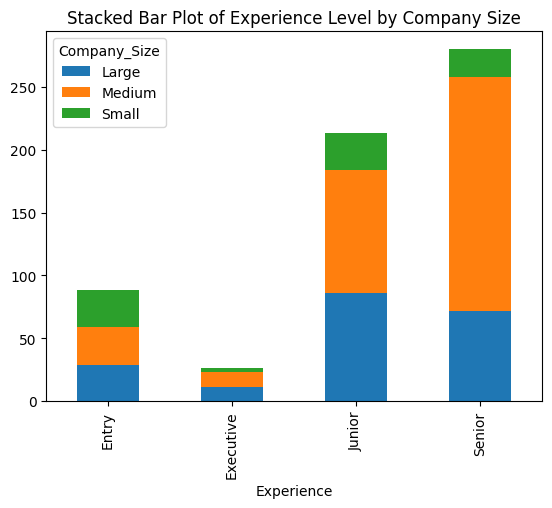

In [463]:
crosstab = pd.crosstab(df['Experience'], df['Company_Size'])
crosstab.plot(kind='bar', stacked=True)
plt.title('Stacked Bar Plot of Experience Level by Company Size')
plt.show()

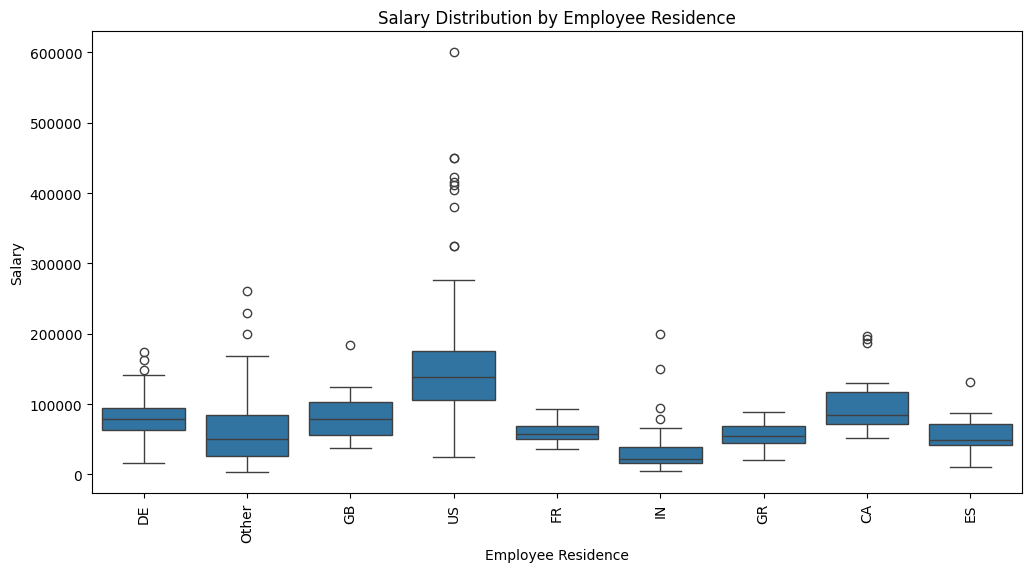

In [464]:
min_entries = 10
df['employee_residence'] = df['employee_residence'].apply(lambda x: x if df['employee_residence'].value_counts()[x] >= min_entries else 'Other')

plt.figure(figsize=(12, 6))
sns.boxplot(x='employee_residence', y='Salary', data=df)
plt.title('Salary Distribution by Employee Residence')
plt.xlabel('Employee Residence')
plt.ylabel('Salary')
plt.xticks(rotation=90)
plt.show()

1. US:
The United States has the widest range of salaries, with several outliers above 400,000 USD and some even reaching above 500,000 USD.
The median salary appears to be higher compared to other countries, indicating that employees in the US generally earn more.
2. DE (Germany):
Germany has a relatively consistent salary range, with most salaries concentrated between approximately 80,000 USD and 120,000 USD.
There are a few outliers above 200,000 USD, but the majority of the data points fall below this.
3. GB (United Kingdom):
The United Kingdom shows a similar salary range to Germany, with most salaries between 80,000 USD and 120,000 USD.
There are fewer outliers compared to the US, indicating a more compact salary distribution.
4. CA (Canada):
Canada has a moderate salary distribution, with most salaries falling between 80,000 USD and 120,000 USD.
There are a few outliers, but the overall range is narrower compared to the US.
5. Other:
The "Other" category likely aggregates several countries with fewer data points. Salaries in this category vary, with a range similar to that of Germany and the UK.
There are outliers above 150,000 USD, but the median salary is lower compared to the US.
6. FR (France):
France has a narrower salary range, with most salaries clustered between 80,000 USD and 120,000 USD.
The presence of outliers is minimal, indicating a more consistent salary structure.
7. IN (India):
India shows the lowest salary range, with most salaries falling between 20,000 USD and 60,000 USD.
The lower salary levels in India are expected given the differences in cost of living and economic conditions.
8. GR (Greece):
Greece has a relatively small salary range, similar to India, with most salaries falling between 40,000 USD and 60,000 USD.
The distribution is tight, with a few outliers but no significant spikes.
9. ES (Spain):
Spain's salary distribution is closer to the lower end, with most salaries falling between 60,000 USD and 80,000 USD.
There are minimal outliers, and the distribution is relatively compact.